In [1]:
# A simple Linear Regression

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import the dataset and we use only numerical features.
dataset1 = pd.read_csv('sample/Salary_Data.csv')
x1 = dataset1.iloc[:, :-1].values
y1 = dataset1.iloc[:, -1].values

# Splitting the dataset into training and test dataset using sklearn package
from sklearn.model_selection import train_test_split as ttst
x_train1, x_test1, y_train1, y_test1 = ttst(x1,y1, test_size = 1/3, random_state = 0)

# Using sklearn's simple linear regression model, create a training model for prediction
from sklearn.linear_model import LinearRegression as LR
regressor = LR()
regressor.fit(x_train1, y_train1)

#Create a y_pred for the training model and name it as y_trainpred
y_trainpred1 = regressor.predict(x_train1)

# creating a prediction using x_test subset created during train_test split. 
# Since X_test independet, it will be used for predicting y_pred a dependent
y_pred1 = regressor.predict(x_test1)


In [2]:
dataset1.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
dataset1.shape

(30, 2)

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


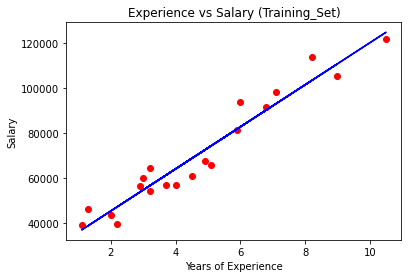

In [5]:
# Let us see how our trainset looks like, we will plot a graph
plt.scatter(x_train1, y_train1, color = 'red') #Setting the plot points as red
plt.plot(x_train1, y_trainpred1, color = 'blue') #Setting the regression line as blue
plt.title('Experience vs Salary (Training_Set)') #Choose a title for the plotted graph and name it as training set.
plt.xlabel('Years of Experience') #Choose a label for the x-axis
plt.ylabel('Salary') #Choose a label for the y-axis
plt.show() # not required in Jupyter notebook IDE, but for other, it will plot the graph.

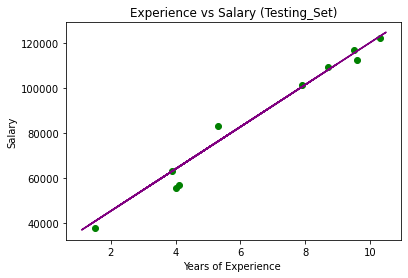

In [6]:
# Let us see how our testset looks like, we will plot a graph
plt.scatter(x_test1, y_test1, color = 'green') #Setting the plot points as green
plt.plot(x_train1, y_trainpred1, color = 'purple') #Setting the regression line as purple
plt.title('Experience vs Salary (Testing_Set)') #Choose a title for the plotted graph and name it as testing set.
plt.xlabel('Years of Experience ') #Choose a label for the x-axis
plt.ylabel('Salary') #Choose a label for the y-axis
plt.show() # not required in Jupyter notebook IDE, but for other, it will plot the graph.

Now, with the simple linear regression, with above example, we have one on one variable. Let's see how with two variable or more variables looks like.

    We know for simple one on one linear regresion, we have y = mx + b + e where e is epsilion or random errors.

    For multiple linear regression, we have y = b0+b1x1+b2x2+b3x3+.....+bnxn + ei 
    
    where i starts from 0 and it can be any number of points outside the regression line, 
          Y= dependent variable
          b0, b1, b2, b3 , bn....= Coefficients of the model.
          x1, x2, x3, x4,...= Various Independent/feature variable

In [9]:
#import libraries as usual

dataset2 = pd.read_csv("sample/50_Startups.csv")
x2 = dataset2.iloc[:,: - 1].values  #for x2, index all features except last feature
y2 = dataset2.iloc[:,-1].values     # for y2, index just last feature   


In [11]:
dataset2.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


    We can see that one of the feature, state is an object, let us see how many states are present and then encode them 

In [13]:
dataset2['State'].value_counts() # One feature and 3 categorical values, this can be hndled using encoder

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [18]:
x2

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [21]:
# Encode categorical data

from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import OneHotEncoder as ohe

CT = ct(transformers = [('encoder', ohe(), [3])], remainder = 'passthrough') #3 is count of the categorical values, californi, new york, florida
X2 = np.array(CT.fit_transform(x2)) # we have gone ahead and transformed the categorical features and placed it at beginning

In [22]:
X2

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [23]:
X2_train, X2_test, y2_train, y2_test = ttst(X2, y2, test_size = 0.25, random_state = 0) #choose X2 since it is encoded, not x2

In [25]:
regressor2 = LR()
regressor2.fit(X2_train, y2_train)

LinearRegression()

In [26]:
y2_pred = regressor.predict(X2_test)

In [29]:
np.set_printoptions(precision = 2) #we have set options so that the value show upto 2 decimals
print(np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[104440.73 103282.38]
 [132253.82 144259.4 ]
 [132872.07 146121.95]
 [ 71707.79  77798.83]
 [178678.99 191050.39]
 [115078.13 105008.31]
 [ 66093.93  81229.06]
 [ 98759.73  97483.56]
 [114113.6  110352.25]
 [167979.49 166187.94]
 [ 95786.77  96778.92]
 [ 87785.35  96479.51]
 [110455.98 105733.54]]


    First column is the predicted value of the y2 and second column is the test set value of the y2_test

All machine Learning is modelled to work with numerical features and values. Machine Learning are unable to understand text or label values, we call this as categorical values or varibles and we will encoode this so that machine understand that each categorical variables is given a preference. In categorical encoding, we convert categories to numericals.

Label encoder is special because it assigned a unique integer bsed on alphabetical ordering. Label encoder will provide value based on 0,1,2 based on uniqueness on the categorical variable. Say we have 4 country, america, russia, india and japan. Here there is no rank and Label encoder will assign the first value for an alphabetical series, i.e , america<india<japan<russia <- this will capture the relationship which we did not intended. This is the drawback with LabelEncoder, so we use OneHotEncoding

OneHotEncoding is a most popular technique which will create a new feature to accomodate the categorical variable. If you have 4 country, russia, USA, india and japan, OneHotEncoding will creates 4 new features as below

    russia 1 0 0 0
    india  0 1 0 0
    japan  0 0 1 0
    USA    0 0 0 1
    
We can see the same has been created in above example. This is referred as OneHot vector. and instead of numericals, we use binary, 0 and 1 which helps computer to work faster. However with say if you have 15 categorical variable, you will end up with 15 new features which confuses any programmers. So this is one of the drawback. This creation of new features will result in creation of dummy variable and this will leads to dummy variable trap where variables are correlated which is a big no no in linear regression analysis. Too many dummy variables creates corrrelation which creats multicolinearity. 

To solve the problem of multicolinearity, we will have to drop one or more dummy variables. We now introduce a new concept Variance Inflation Factor(VIF) :  

        VIF=1, Very Less Multicollinearity
        VIF<5, Moderate Multicollinearity
        VIF>5, Extreme Multicollinearity (This is what we have to avoid)

https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/ 

When to use a Label Encoding vs. One Hot Encoding
This question generally depends on your dataset and the model which you wish to apply. But still, a few points to note before choosing the right encoding technique for your model:

We apply One-Hot Encoding when:

    The categorical feature is not ordinal (like the countries above)
    The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

    The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
    The number of categories is quite large as one-hot encoding can lead to high memory consumption

We have so far assumed that the the regression analysis plotted points will always be in the straight line or near staright line. However, if there are chances that the plotted line can be a curve, in this case, we will use polynomial regression. Although bit elusive to guess the curve, it is a wonderful regression analysis. 

In Polynomial regression, the original features are converted into polynomial features of required degree( 2,3,4, .... n) and then modelled using linear regression. Polynomial regression is always used on non-linear dataset. 

![](images/poly_reg_1.png)

You can see what do we mean by non-linear dataset. 

always remember that all performace should be between 0 and 1. Anything above 1 is considered a over fitted model and will be rejected. 

In [37]:
dataset3 = pd.read_csv('sample/Position_Salaries.csv')
x3 = dataset3.iloc[:,1:-1].values
y3 = dataset3.iloc[:,-1].values

In [38]:
dataset3.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [39]:
x3

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [40]:
y3

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

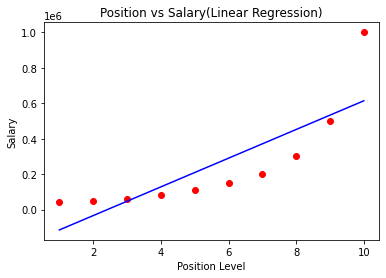

In [42]:
# training whole model on linear regression

from sklearn.linear_model import LinearRegression as LR
lin_reg = LR()
lin_reg.fit(x3,y3)

#plot the whole dataset

plt.scatter(x3,y3, color = 'red')
plt.plot(x3, lin_reg.predict(x3), color = 'blue')
plt.title('Position vs Salary(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

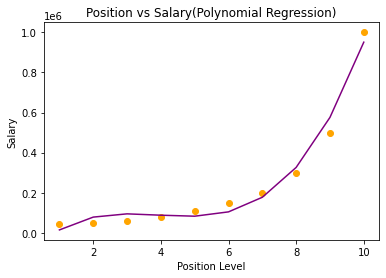

In [48]:
# training the whole set for polynomial regression

#we have to understand that polynomial features will calculate the linear regression hence prepricessing.

from sklearn.preprocessing import PolynomialFeatures as PF 
poly_reg = PF(degree = 3) #upto third degree
x3_poly = poly_reg.fit_transform(x3)
poly_linreg = LR()
poly_linreg.fit(x3_poly, y3) 

# plot the whole dataset

plt.scatter(x3, y3, color = 'orange')
plt.plot(x3, poly_linreg.predict(poly_reg.fit_transform(x3)), color = 'purple')
plt.title('Position vs Salary(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


In [45]:
# predict what will be the salary for the position 10.5, the person above CEO, assume he will be referred as junior investor

#This is for linear model and salary will be 653893 dollars, wowza!! 

lin_reg.predict([[10.5]])

array([653893.94])

In [47]:
# predict what will be the salary for the position 10.5, the person above CEO, assume he will be referred as junior investor

#This is for polynmial model and salary will be 1335692 dollars, mamma mia!!


poly_linreg.predict(poly_reg.fit_transform([[10.5]]))

array([1335692.29])

Although this is a idel case business scenario. Which doesn't exist. Problem with linear regression model is garbage in, garbage out. The more you feed, the more it will show which is not reliable in most cases.